<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [38]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem, beta

import pylab as plt


In [39]:
# datos

game = pd.read_csv('data/cookie_cats.csv')
game.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
game['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [8]:
# retention_1

game.groupby(['version', 'retention_1']).size()

version  retention_1
gate_30  False          24666
         True           20034
gate_40  False          25370
         True           20119
dtype: int64

In [17]:
# retention_7 

game.groupby(['version', 'retention_7']).size()

version  retention_7
gate_30  False          36198
         True            8502
gate_40  False          37210
         True            8279
dtype: int64

In [19]:
# transformacion

# retention_1

imps_ctrl, convs_ctrl = 44700, 20034

imps_test, convs_test = 45489, 20119


CR_ctrl = convs_ctrl / imps_ctrl
CR_test = convs_test / imps_test

print('retention_1: ', f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}')

# retention_7

imps_ctrl7, convs_ctrl7 = 44700, 8502

imps_test7, convs_test7 = 45489, 8279


CR_ctrl7 = convs_ctrl7 / imps_ctrl7
CR_test7 = convs_test7 / imps_test7

print('retention_7: ', f'Tasas conversion: Control: {CR_ctrl7}, Test: {CR_test7}')



retention_1:  Tasas conversion: Control: 0.4481879194630872, Test: 0.44228274967574577
retention_7:  Tasas conversion: Control: 0.19020134228187918, Test: 0.18200004396667327


In [20]:
# muestreo

# retention_1 

a_C, b_C = 1 + convs_ctrl, 1 + imps_ctrl - convs_ctrl
a_T, b_T = 1 + convs_test, 1 + imps_test - convs_test

# retention_7

a_C7, b_C7 = 1 + convs_ctrl7, 1 + imps_ctrl7 - convs_ctrl7
a_T7, b_T7 = 1 + convs_test7, 1 + imps_test7 - convs_test7


In [37]:
# testeo para retention_1

beta_control = beta(a_C, b_C)
beta_test = beta(a_T, b_T)

beta_control.mean(), beta_test.mean()

(0.44819023757326293, 0.44228528719966587)

In [21]:
# testeo para retention_7

beta_control7 = beta(a_C7, b_C7)
beta_test7 = beta(a_T7, b_T7)

beta_control7.mean(), beta_test7.mean()

(0.19021520289919913, 0.18201402475214878)

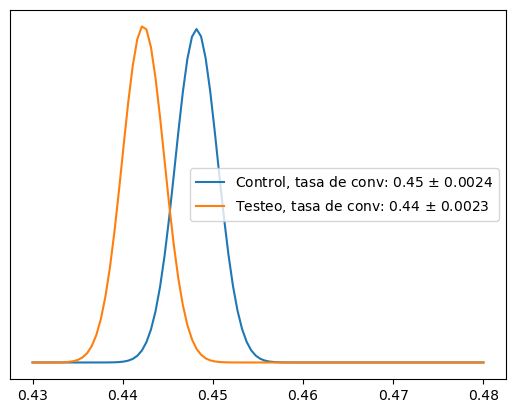

In [27]:
# retention_1

x=np.linspace(0.43,0.48, 100)
def plot(betas, nombres):
    for bet, nom in zip(betas, nombres):
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        plt.plot(x, y, label='{}, tasa de conv: {:.2f} $\pm$ {:.4f}'.format(nom, y_media, y_std))
        plt.yticks([])
    plt.legend()
    plt.show();

plot([beta_control, beta_test], ['Control', 'Testeo'])

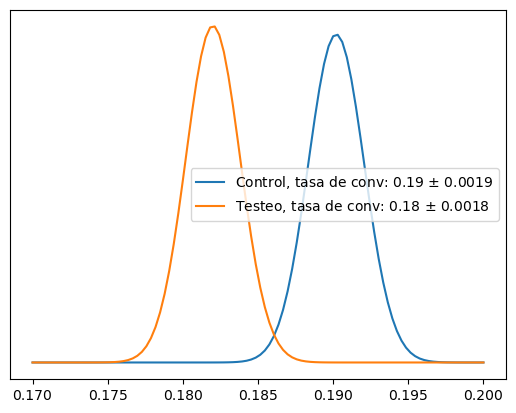

In [30]:
# retention_7

x=np.linspace(0.17,0.20, 100)
def plot(betas, nombres):
    for bet, nom in zip(betas, nombres):
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        plt.plot(x, y, label='{}, tasa de conv: {:.2f} $\pm$ {:.4f}'.format(nom, y_media, y_std))
        plt.yticks([])
    plt.legend()
    plt.show();

plot([beta_control7, beta_test7], ['Control', 'Testeo'])

In [40]:
# retention_1

salto = (beta_control.mean() - beta_test.mean())/beta_control.mean()
salto

0.013175098158249857

In [41]:
# retention_7

salto = (beta_control7.mean() - beta_test7.mean())/beta_control7.mean()
salto

0.04311526114658881

In [35]:
# retention_1

bayes.calc_prob(beta_control, beta_test)

0.962793974846091

In [36]:
# retention_7

bayes.calc_prob(beta_control7, beta_test7)

0.9992226613159454

In [ ]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.

''' 
En el caso de retention_1 el test reduce la tasa de conversión
en un 1.31% con una probabilidad de 0.96.

En el caso de retention_7 el test reduce la tasa de conversión
en un 4.31% con una probabilidad de 0.99. '''